In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path

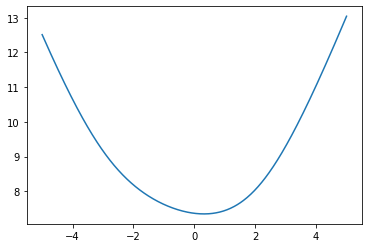

In [16]:
Transmisor = np.array([-3,2])
Receptor = np.array([2,-2])
def tiempo(t,r,x,n1=1,n2=1.33):
    b = (x-t[0])**2
    v = t[1]**2
    n = (x-r[0])**2
    m = r[1]**2
    T = n1*(b+v)**(1/2)+n2*(n+m)**(1/2)
    return T
x = np.linspace(-5,5,500)
t = tiempo(Transmisor,Receptor,x)
plt.plot(x,t)

In [26]:
def Derivative(f,x,t,r,h=1e-4):
   #print (x)
    return (f(t,r,x+h)-f(t,r,x-h))/(2*h)
def Second (f,x,t,r,h=1e-4):
   #print(x)
    a = f(t,r,x+h)
    b = f(t,r,x)
    c = f(t,r,x-h)
    return (a-2*b+c)/(h**2)

In [29]:
def GetNewtonRaphson(f,df,dff,xn,t,r,itmax = 100, precision=1e-5):
    
    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        
        try:
            
            xn1 = xn - df(f,xn,t,r)/dff(f,xn,t,r)
            error = np.abs(df(f,xn,t,r)/dff(f,xn,t,r))
            
        except ZeroDivisionError:
            
            print('Division por cero')
            
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn

In [30]:
e = GetNewtonRaphson(tiempo,Derivative,Second,0.5,Transmisor,Receptor)
e

0.31690575636706664